# CrossTab and Melting

Alrighty, let's mix it up, superhero data it is. https://www.kaggle.com/claudiodavi/superhero-set

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("heroes_information.csv")
df.drop(columns=df.columns[0], inplace=True)
df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


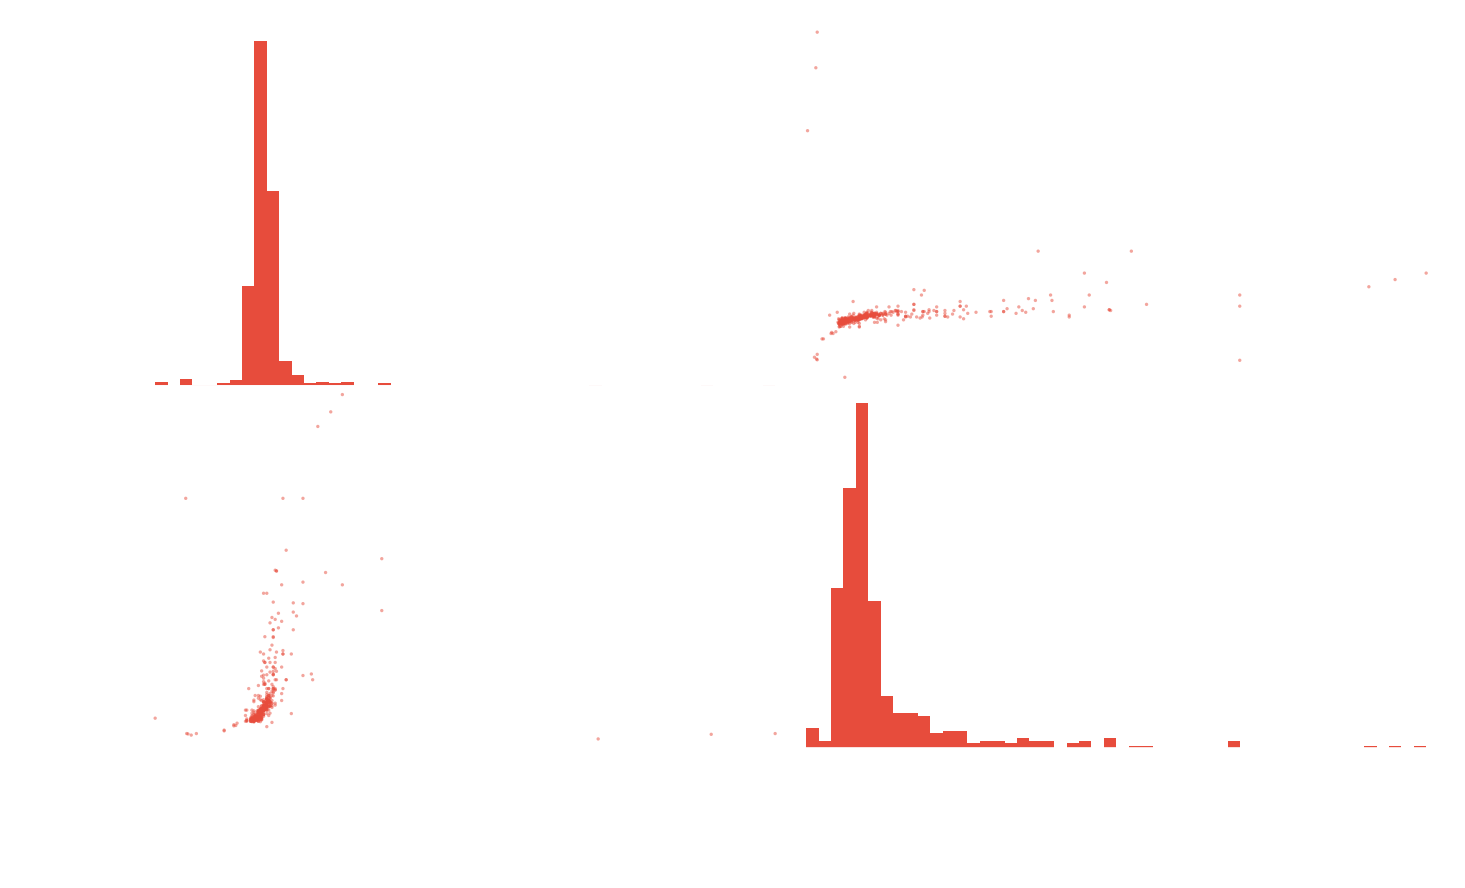

In [4]:
df = df.replace(-99, np.NaN)
pd.plotting.scatter_matrix(df);

## Crosstab

Like pivot_table but for arrays not dataframes. And uses frequency not mean as default

In [5]:
pd.crosstab(index=df["Skin color"], columns=df["Eye color"])

Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Skin color,,,,,,,,,,,,,,,,,,,,,
-,167,2,18,212,1,1,125,2,63,1,...,2,28,1,2,9,1,13,1,1,0
black,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blue,0,0,1,5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
blue-white,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
gold,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
gray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
green,1,0,1,2,0,0,1,0,7,0,...,1,7,0,0,0,0,1,0,0,0
grey,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
orange,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.pivot_table(index="Skin color", columns="Eye color", values="Alignment", 
              aggfunc="count", dropna=False, fill_value=0)

Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Skin color,,,,,,,,,,,,,,,,,,,,,
-,167,2,18,212,1,1,125,2,63,1,...,2,28,1,2,9,1,13,1,1,0
black,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blue,0,0,1,5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
blue-white,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
gold,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
gray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
green,1,0,1,2,0,0,1,0,7,0,...,1,7,0,0,0,0,1,0,0,0
grey,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
orange,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Great, so we can get them equivalent. Is there anything more to using crosstab?

Well, an option it has that `pivot_table` doesn't have is normalise. First, group on Gender and Alignment and just do a count.

In [10]:
pd.crosstab(index=df["Gender"], columns=df["Alignment"], margins=True)

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,1,7,19,2,29
Female,0,35,161,4,200
Male,6,165,316,18,505
All,7,207,496,24,734


More useful if we saw this as a fraction of the whole

In [12]:
100 * pd.crosstab(index=df["Gender"], columns=df["Alignment"], margins=True, normalize="all")

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,0.136240,0.953678,2.588556,0.272480,3.950954
Female,0.000000,4.768392,21.934605,0.544959,27.247956
Male,0.817439,22.479564,43.051771,2.452316,68.801090
All,0.953678,28.201635,67.574932,3.269755,100.000000


In [14]:
100 * pd.crosstab(index=df["Gender"], columns=df["Alignment"], margins=True, normalize="columns")

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,14.285714,3.381643,3.830645,8.333333,3.950954
Female,0.000000,16.908213,32.459677,16.666667,27.247956
Male,85.714286,79.710145,63.709677,75.000000,68.801090


Crosstab. Like `pivot_table`, when you don't have a dataframe. 

## Melting

Unwrapped a 2D dataframe like this.

In [23]:
res = df.fillna(0).pivot_table(index="Gender", columns="Alignment", values="Height",
                              aggfunc="count", margins=True, fill_value=0)
res

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,1,7,19,2,29
Female,0,35,161,4,200
Male,6,165,316,18,505
All,7,207,496,24,734


In [25]:
res.melt()

,Alignment,value
0,-,1
1,-,0
2,-,6
3,-,7
4,bad,7
5,bad,35
6,bad,165
7,bad,207
8,good,19
9,good,161


In [27]:
res.reset_index().melt()

,Alignment,value
0,Gender,-
1,Gender,Female
2,Gender,Male
3,Gender,All
4,-,1
5,-,0
6,-,6
7,-,7
8,bad,7
9,bad,35


In [29]:
res.reset_index()

Alignment,Gender,-,bad,good,neutral,All
0,-,1,7,19,2,29
1,Female,0,35,161,4,200
2,Male,6,165,316,18,505
3,All,7,207,496,24,734


In [33]:
work = res.reset_index().melt(id_vars="Gender", value_name="Count")
work

,Gender,Alignment,Count
0,-,-,1
1,Female,-,0
2,Male,-,6
3,All,-,7
4,-,bad,7
5,Female,bad,35
6,Male,bad,165
7,All,bad,207
8,-,good,19
9,Female,good,161


In [34]:
works.pivot_table(index="Gender", columns="Alignment", values="Count")

Alignment,-,All,bad,good,neutral
Gender,,,,,
-,1,29,7,19,2
All,7,734,207,496,24
Female,0,200,35,161,4
Male,6,505,165,316,18


In [36]:
works.set_index(["Gender", "Alignment"]).Count.unstack()

Alignment,-,All,bad,good,neutral
Gender,,,,,
-,1,29,7,19,2
All,7,734,207,496,24
Female,0,200,35,161,4
Male,6,505,165,316,18


So many different ways of doing things. So we showed you can use pivot_table and unstack to undo a melt. A melt being flattening out a pivot table. As a final thing, can you use stack to melt a pivot table?

In [37]:
res

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,1,7,19,2,29
Female,0,35,161,4,200
Male,6,165,316,18,505
All,7,207,496,24,734


In [40]:
res.stack().to_frame("Count").reset_index()

,Gender,Alignment,Count
0,-,-,1
1,-,bad,7
2,-,good,19
3,-,neutral,2
4,-,All,29
5,Female,-,0
6,Female,bad,35
7,Female,good,161
8,Female,neutral,4
9,Female,All,200


As you can see, there are tons of ways of doing everything in pandas. Lots of helper functions that, like crosstab to pivot_table invoke the same thing underneath, but are just designed with different syntax or to make your life slightly easier in very specific different use cases.

### Recap:
* crosstab
* Differences to pivot_table
* to_frame
* melt